In [2]:
from IPython.display import Image

## 합성곱 신경망은 이미지 처리에 탁월한 성능을 보이는 신경망이다. 이번 챕터에서는 합성곱 연산과 풀링 연산에 대해서 알아본다.

### 1. 합성곱 신경망의 대두

기존의 다층 퍼셉트론은 이미지 처리에 한계가 있었다. 몇 가지 픽셀값만 달라져도 민감하게 반응한다.  
이미지를 다층 퍼셉트론에 활용하기 위해 1차원 벡터로 바꾸면, 공간적인 구조(spatial structure) 정보가 유실된다. 이를 보존하는 학습법이 바로 합성곱 신경망이다.

### 2. 채널(Channel)

이미지는 (높이, 너비, 채널)이라는 3차원 텐서이다.  
흑백 이미지는 채널 수가 1이며, 각 픽셀은 0 ~ 255 사이의 값을 가진다.  
컬러 이미지는 red, green, blue 총 채널 수가 3이다.  
채널은 때로 깊이(depth)라고 표현된다.

즉 이미지는 (높이, 너비, 깊이)라는 3차원 텐서라고도 말할 수 있다.

### 3. 합성곱 연산(Convolution operation)

합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할을 한다.  
커널, 또는 필터라는 $n*m$ 크기의 행렬로,  
높이 * 너비 크기의 이미지를 처음부터 끝까지 겹쳐치며 훑으면서  
n*m크기의 겹쳐지는 부분의 각 이미지와 커널의 원소값을 곱해서 모두 더한 값을 출력으로 한다.  

이와 같이 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과를 feature map이라고 한다.  
또한 커널의 이동 범위를 stride라고 한다.

### 4. 패딩(Padding)

합성곱 연산의 결과로 얻은 feature map은 입력보다 크기가 작아지게 된다.  
feature map의 크기를 입력의 크기와 동일하게 유지하고 싶다면 padding을 사용한다. 

패딩(Padding)은 가장자리에 행과 열을 추가하는 것을 말한다.  
주로 0을 채우는 zero padding을 사용한다.  

커널은 주로 3 X 3, 5 X 5를 사용한다.  
stride가 1일 때,   
3 X 3 커널을 사용한다면, 1폭짜리 zero padding을 사용하고,  
5 X 5 커널을 사용한다면, 2폭짜리 zero padding을 사용하면  
입력 크기와 feature map의 크기를 보존할 수 있다.   

### 5. 가중치와 편향

#### 1) 합성곱 신경망의 가중치

다층 퍼셉트론으로 3 x 3 이미지를 처리한다고 가정해보자.  
우선 이미지를 1차원 텐서인 벡터로 만들면, 3 x 3 = 9가 되므로 입력층은 9개의 뉴런을 가진다.  
그리고 4개의 뉴런을 가지는 은닉층을 추가한다고 해보자.  
이는 아래의 그림과 같다. 

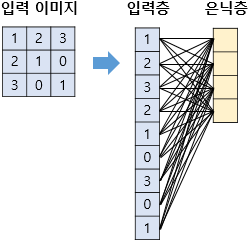

In [3]:
Image("./scr/08 - 01 conv11.png")

위에서 각 연결선은 가중치를 의미하므로,  
위의 그림에서는 9 x 4 = 36개의 가중치를 가진다.

이제 비교를 위해 합성곱 신경망으로 3 x 3 이미지를 처리한다고 해보자.  
2 x 2 커널을 사용하고, stride는 1로 한다.  

합성곱 신경망에서 가중치는 커널 행렬들의 원소이다.  
이를 인공 신경망의 형태로 표현한다면 다음과 같이 표현할 수 있다.  

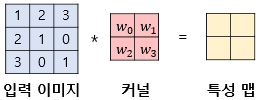

In [ ]:
Image("./scr/08-01 conv12.png")

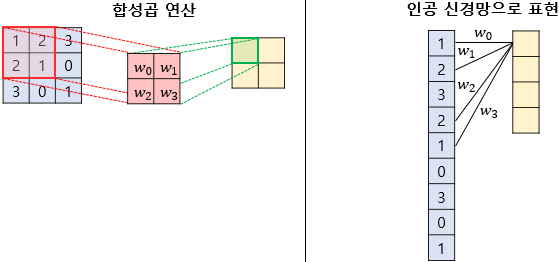

In [7]:
Image("./scr/08-01 conv13.png")

최종적으로 feature map을 얻기 위해서는 동일한 커널로 이미지 전체를 훑으며 합성곱 연산을 진행한다. 결국 이미지 전체를 훑으면서 사용되는 가중치는 $w_{0},w_{1},w_{2},w_{3}$ 4개 뿐이다. 그리고 각 합성곱 연산마다 이미지의 모든 연산을 사용하는 것이 아니라, 커널과 매핑되는 픽셀만을 사용하는 것을 알 수 있다.  
결국 합성곱 신경망은 다층 퍼셉트론을 사용할 때보다 훨씬 적은 수의 가중치를 사용하여 공간적 구조 정보를 보존한다는 특징이 있다.

다층 퍼셉트론의 은닉층에는 가중치 연산 후에 비선형성을 추가하기 위해서 활성화 함수를 통과시켰다.  
합성곱 신경망의 은닉층에서도 마찬가지이다. 합성곱 연산은 통해 얻은 feature map은 다층 퍼셉트론과 마찬가지로 비선형성 추가를 위해 활성화 함수를 지나게 된다. 이때 ReLU나, ReLU의 변형등이 주로 활용된다.  
이와 같이 합성곱 연산을 통해서 feature map을 얻고, 활성화 함수를 지나는 연산을 하는 합성곱 신경망의 은닉층을 합성곱 신경망에서는 합성곱 층(convolution layer)라고 한다.

#### 2) 합성곱 신경망의 편향

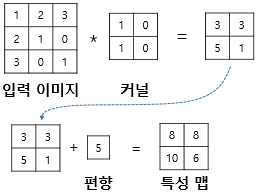

In [9]:
Image("./scr/08-01 conv14.png")

합성곱 신경망에도 편향(bias)를 당연히 추가할 수 있다.  
편향을 사용한다면 커널을 적용한 뒤에 더해진다.  
편향은 하나의 값만 존재하며, 커널이 적용된 결과의 모든 원소에 더해진다.

### 6. 특성 맵의 크기 계산 방법

우선 다음 변수들을 정의하자.  
$I_{h}$ : input의 높이  
$I_{w}$ : input의 너비  
$K_{h}$ : kernel의 높이      
$K_{w}$ : kernel의 너비   
$S$ : stride    
$O_{h}$ : feature map의 높이    
$O_{w}$ : feature map의 너비    

- feature map의 높이와 너비

여기서 $floor$ 함수는 소수점 발생시 소수점 이하를 버리는 역할을 한다.  

$O_{h} = floor(\frac{I_{h} - K_{h}}{S}+1)$

$O_{w} = floor(\frac{I_{w} - K_{w}}{S}+1)$

- 패딩까지 고려한 식($P$가 패딩)

$O_{h} = floor(\frac{I_{h} - K_{h} + 2P}{S}+1)$

$O_{w} = floor(\frac{I_{w} - K_{w} + 2P}{S}+1)$

### 7. 다수의 채널을 가질 경우의 합성곱 연산(3차원 텐서의 합성곱 연산)

실제로 합성곱 연산의 입력은 '다수의 채널을 가진' 이미지 또는 이전 연산의 결과로 나온 특성 맵일 수 있다. 만약 다수의 채널을 가진 입력 데이터를 가지고 합성곱 연산을 한다면 커널의 채널 수도 입력의 채널 수만큼 존재해야 한다.  

다시 말해 **입력 데이터의 채널 수와 커널의 채널 수는 같아야 한다.**  
채널 수가 같으므로 합성곱 연산을 채널마다 수행한다.  
그리고 그 결과를 모두 더하여 최종 feature map을 얻는다.  

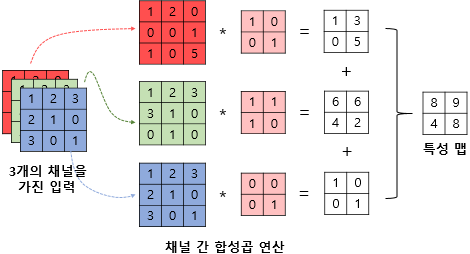

In [10]:
Image("./scr/08-01 conv15.png")

위의 그림을 말로 표현하자면,    
채널 3개.     
커널 2 * 2가 3개.  
합성 곱 결과는 feature map으로 저장.

### 8. 3차원 텐서의 합성곱 연산

우선 다음 변수들을 정의하자.  
$I_{h}$ : input의 높이  
$I_{w}$ : input의 너비  
$K_{h}$ : kernel의 높이      
$K_{w}$ : kernel의 너비   
$O_{h}$ : feature map의 높이    
$O_{w}$ : feature map의 너비  
$C_{i}$ : 입력 데이터의 채널    

높이 $I_{h}$, 너비 $I_{w}$, 채널 $C_{i}$의 입력 데이터는  
동일한 채널 수 $C_{i}$를 가지는 높이 $K_{h}$, 너비 $K_{w}$의 커널과 합성곱 연산을 하여    
높이 $O_{h}$, 너비 $O_{w}$, 채널 1의 특성 맵을 얻는다.

그런데 하나의 입력에 여러 개의 커널을 사용하는 합성곱 연산을 할 수도 있다.

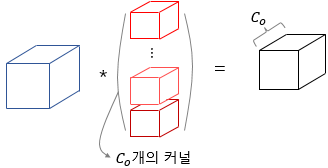

In [11]:
Image("./scr/08-01 conv17_final_final.png")

합성곱 연산에서 다수의 커널을 사용할 경우,  
사용한 커널 수는  
결과값인 합성곱 연산의 결과로 나오는 feature map의 채널 수가 된다.  

단순한 이야기이다.  
커널 위에 채널이 있다.  
하나의 입력의 다수의 커널을 사용한다. 는 말은     
그게 채널마다 다수의 커널을 사용한다는 말이다.  
따라서 가중치 매개변수의 총 개수를 구한다면,  
$K_{i} \times K_{o}$(= 커널 1개가 갖는 가중치 갯수) $\times C_{i}$ (=그 커널이 하나의 채널안에 여러 개) $\times C_{o}$

### 9. 풀링(Pooling)

일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적이다.  
풀링 층에서는 feature map을 다운샘플링하여  
feature map의 크기를 줄이는 풀링 연산이 이루어진다.  
풀링 연산은 max pooling, average pooling이 있다.  

- max pooling  
kernel과 겹치는 영역 안에서 최댓값만 추출한다.
- average pooling  
kernel과 겹치는 영역 안의 평균만을 추출한다.

합성곱 연산과 유사하나,  
학습할 가중치가 없으며 연산 후에 채널 수가 변하지 않는다는 차이가 있다.